In [75]:
import numpy as np
import matplotlib.pyplot as plt

from pygrid import grid_kernel, pygrid
from gen_phantom import gen_phantom

ERROR:  8.38229


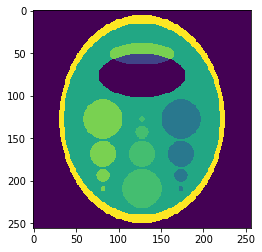

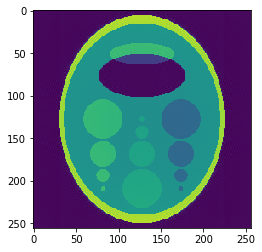

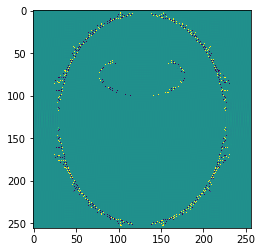

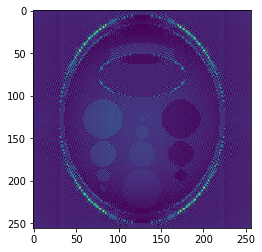

In [77]:
N_proj = 1024
gg = pygrid.Gridder(kernel_type='kb', over_samp=1.5, krad=1.5, grid_mod = 32)

r = np.linspace(-0.5, 0.5, 512)
kx_all = []
ky_all = []
for theta in np.linspace(0, 2*np.pi, N_proj):
    kx_all.append(np.cos(theta) * r)
    ky_all.append(-np.sin(theta) * r)
k_all = np.stack((kx_all, ky_all), axis=-1)
kx_all = np.array(kx_all)
ky_all = np.array(ky_all)
dens = np.sqrt(kx_all*kx_all + ky_all*ky_all)

im = gen_phantom.gen_phantom()
k = gg.im2k(im, traj=k_all, dens=dens)
im2 = gg.k2im(k, traj=k_all, dens=dens)

im2c = im2.copy()

im = np.abs(im)
im2 = np.abs(im2)

im2 /= im2.mean()/im.mean()

print('ERROR: ', np.linalg.norm(im-im2))

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im2)

plt.figure()
plt.imshow(np.angle(im2c))

plt.figure()
plt.imshow(np.abs(im2-im))

In [6]:


k = gg.im2k(im, traj=k_all, dens=dens)
im2 = gg.k2im(k, traj=k_all, dens=dens)
k2 = gg.im2k(im2, traj=k_all, dens=dens)
im3 = gg.k2im(k2, traj=k_all, dens=dens)

In [ ]:
plt.plot(np.abs(k[:512]))

0.342511 8.914057


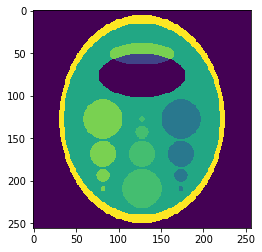

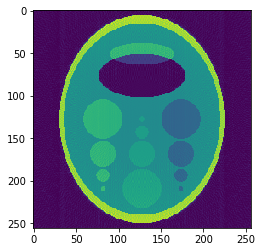

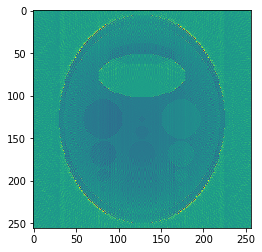

In [14]:
im = np.abs(im)
im2 = np.abs(im2)

print(im.mean(), im2.mean())

im2 /= im2.mean()/im.mean()

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im2)

plt.figure()
plt.imshow(im2-im)

In [ ]:
im2 = np.fft.ifftshift(np.fft.ifftn(np.fft.fftshift(k)))
plt.imshow(np.abs(im2))

In [ ]:
r = np.linspace(-0.5, 0.5, 256)
kx_all = []
ky_all = []
for theta in np.linspace(0, 2*np.pi, 200):
    kx_all.append(np.cos(theta) * r)
    ky_all.append(-np.sin(theta) * r)
    
k_all = np.stack((kx_all, ky_all), axis=-1)
print(k_all.shape)

k_all = np.concatenate((k_all, np.zeros_like(k_all[...,-1:])), axis=k_all.ndim-1)
print(k_all.shape)

# k_all = np.reshape(k_all, (-1, 3))
# print(k_all.shape)

# print(k_all[0:5])
# print(k_all.ravel()[:10])

In [ ]:
print(k_all.T.shape)

In [ ]:
print(k_all[...,-1:].shape)

In [ ]:
k_all.dtype == np.float32